## Implementation Experiments for 3D Gaussian Volumetric Pathtracing

___________________________________________________
### Verifying Baseline Raymarcher vs. Mitsuba

In [1]:
import mitsuba as mi
mi.set_variant('scalar_rgb')

import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
scene = mi.load_file('env_one_sphere_test_ortho.xml')
ref_img = mi.render(scene, spp=4096)

/tmp/ipykernel_47764/3204298751.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  user_img = imageio.imread('../tests/renders/env_test_orthographic.ppm').astype(np.float32) / 255.0


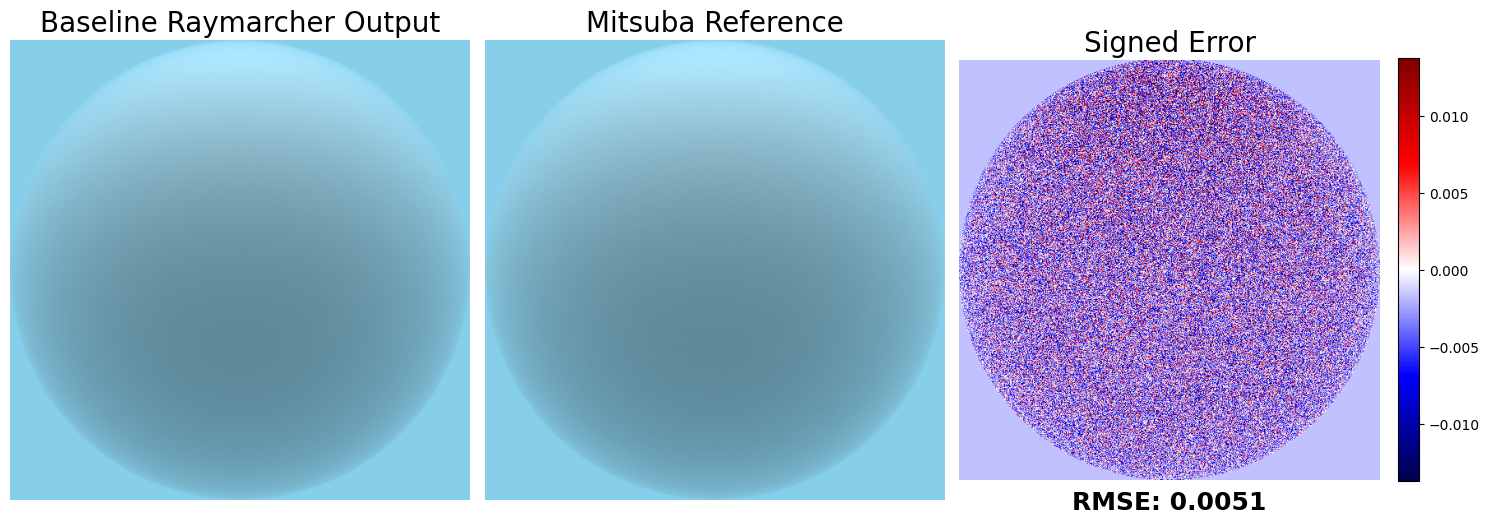

In [4]:
ref_img = np.clip(ref_img, 0.0, 1.0)
user_img = imageio.imread('../tests/renders/env_test_orthographic.ppm').astype(np.float32) / 255.0

diff = user_img - ref_img

signed_error = np.mean(diff, axis=2)

clip_val = np.percentile(np.abs(signed_error), 99)

rmse = np.sqrt(np.mean(diff**2))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(user_img)
axs[0].set_title('Baseline Raymarcher Output', fontsize=20)
axs[0].axis('off')

axs[1].imshow(ref_img)
axs[1].set_title('Mitsuba Reference', fontsize=20)
axs[1].axis('off')

im = axs[2].imshow(signed_error, cmap='seismic',
                   vmin=-clip_val, vmax=clip_val)
axs[2].set_title('Signed Error', fontsize=20)
axs[2].axis('off')
fig.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
axs[2].text(0.5, -0.055, f'RMSE: {rmse:.4f}', transform=axs[2].transAxes,
            ha='center', va='center', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

___________________________________________________
### Verifying Analytical Transmittance/Free-Flight Sampling vs. Baseline Raymarcher



/tmp/ipykernel_47764/2891992755.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ref_img = imageio.imread('../tests/renders/2_gaussian_ref.ppm').astype(np.float32) / 255.0
/tmp/ipykernel_47764/2891992755.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  user_img = imageio.imread('../tests/renders/2g_freeflight.ppm').astype(np.float32) / 255.0


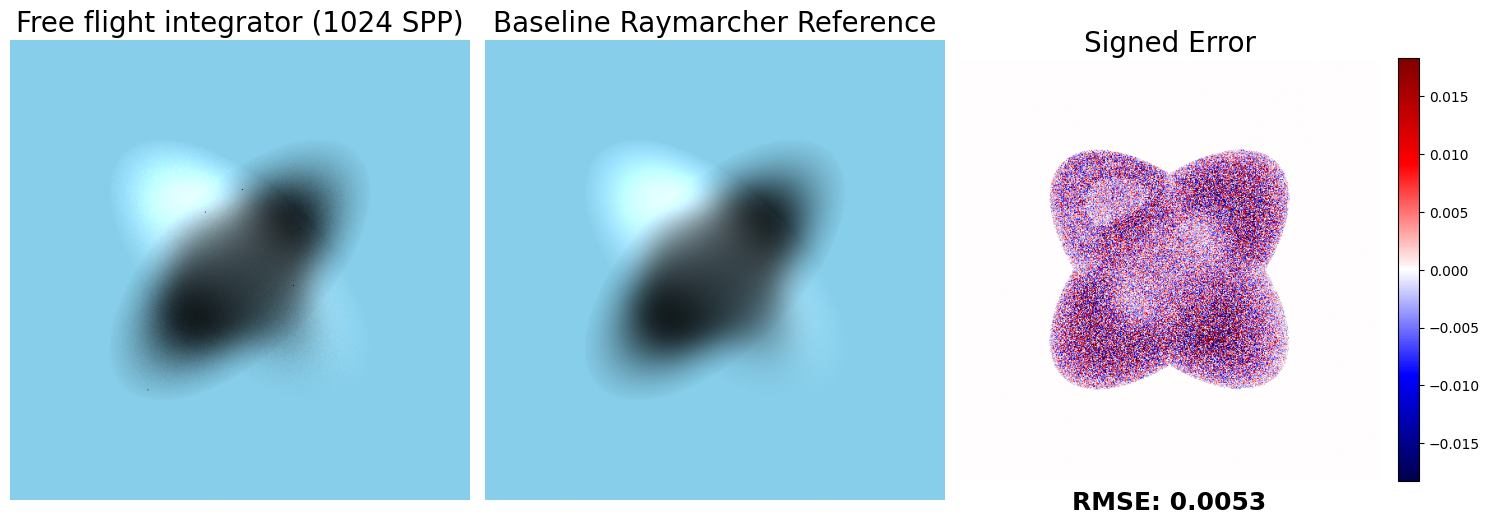

In [5]:
ref_img = imageio.imread('../tests/renders/2_gaussian_ref.ppm').astype(np.float32) / 255.0
user_img = imageio.imread('../tests/renders/2g_freeflight.ppm').astype(np.float32) / 255.0

diff = user_img - ref_img

signed_error = np.mean(diff, axis=2)

clip_val = np.percentile(np.abs(signed_error), 99)

rmse = np.sqrt(np.mean(diff**2))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(user_img)
axs[0].set_title('Free flight integrator (1024 SPP)', fontsize=20)
axs[0].axis('off')

axs[1].imshow(ref_img)
axs[1].set_title('Baseline Raymarcher Reference', fontsize=20)
axs[1].axis('off')

im = axs[2].imshow(signed_error, cmap='seismic',
                   vmin=-clip_val, vmax=clip_val)
axs[2].set_title('Signed Error', fontsize=20)
axs[2].axis('off')
fig.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
axs[2].text(0.5, -0.055, f'RMSE: {rmse:.4f}', transform=axs[2].transAxes,
            ha='center', va='center', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipykernel_47764/3538997389.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ref_img = imageio.imread('../tests/renders/7_gaussian_ref.ppm').astype(np.float32) / 255.0
/tmp/ipykernel_47764/3538997389.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  user_img = imageio.imread('../tests/renders/tl_freeflight.ppm').astype(np.float32) / 255.0


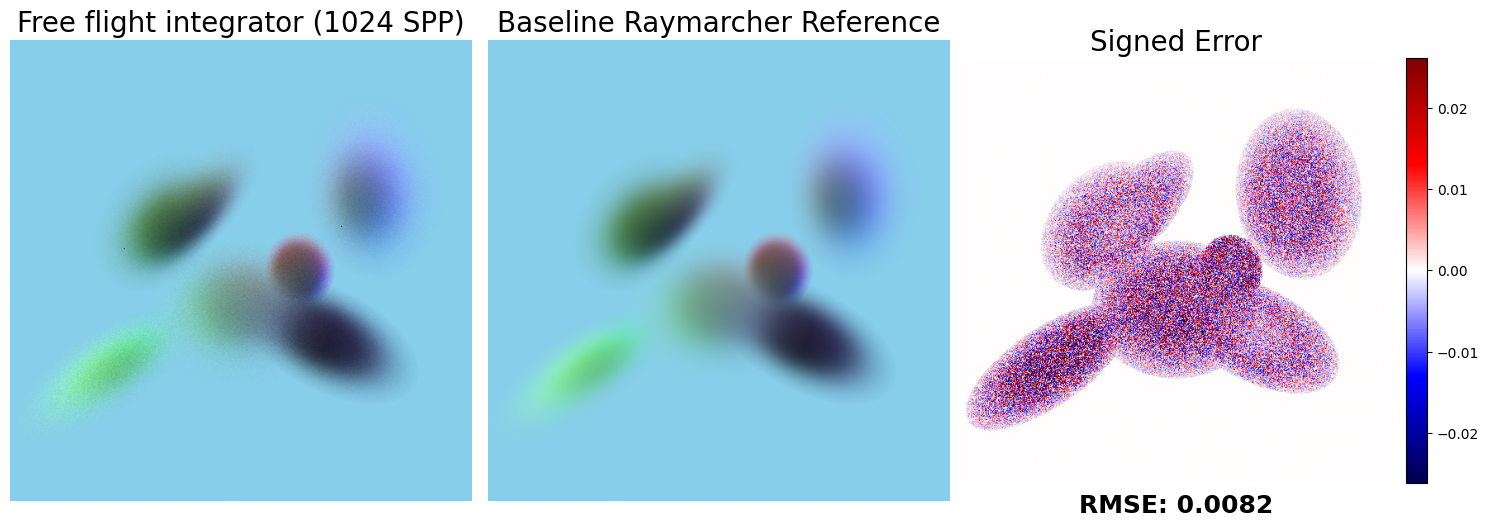

In [6]:
ref_img = imageio.imread('../tests/renders/7_gaussian_ref.ppm').astype(np.float32) / 255.0
user_img = imageio.imread('../tests/renders/tl_freeflight.ppm').astype(np.float32) / 255.0

diff = user_img - ref_img

signed_error = np.mean(diff, axis=2)

clip_val = np.percentile(np.abs(signed_error), 99)

rmse = np.sqrt(np.mean(diff**2))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(user_img)
axs[0].set_title('Free flight integrator (1024 SPP)', fontsize=20)
axs[0].axis('off')

axs[1].imshow(ref_img)
axs[1].set_title('Baseline Raymarcher Reference', fontsize=20)
axs[1].axis('off')

im = axs[2].imshow(signed_error, cmap='seismic',
                   vmin=-clip_val, vmax=clip_val)
axs[2].set_title('Signed Error', fontsize=20)
axs[2].axis('off')
fig.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
axs[2].text(0.5, -0.055, f'RMSE: {rmse:.4f}', transform=axs[2].transAxes,
            ha='center', va='center', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

___________________________________________________
### Comparing Single vs. Multiple Scattering on Large Scenes

/tmp/ipykernel_47764/2870421569.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread('../tests/renders/50_rand_ss.ppm').astype(float) / 255.0
/tmp/ipykernel_47764/2870421569.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread('../tests/renders/50_rand_ms.ppm').astype(float) / 255.0
/tmp/ipykernel_47764/2870421569.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imagei

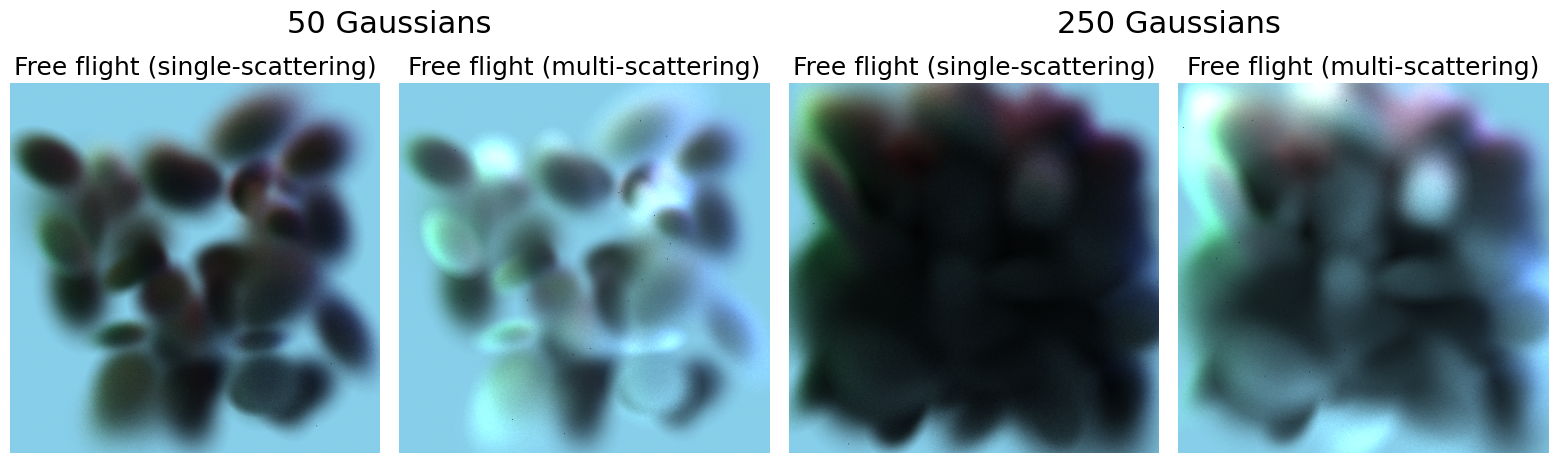

In [7]:
img1 = imageio.imread('../tests/renders/50_rand_ss.ppm').astype(float) / 255.0
img2 = imageio.imread('../tests/renders/50_rand_ms.ppm').astype(float) / 255.0
img3 = imageio.imread('../tests/renders/250_rand_ss.ppm').astype(float) / 255.0
img4 = imageio.imread('../tests/renders/250_rand_ms.ppm').astype(float) / 255.0

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img1)
axs[0].set_title('Free flight (single-scattering)', fontsize=18)
axs[0].axis('off')

axs[1].imshow(img2)
axs[1].set_title('Free flight (multi-scattering)', fontsize=18)
axs[1].axis('off')

axs[2].imshow(img3)
axs[2].set_title('Free flight (single-scattering)', fontsize=18)
axs[2].axis('off')

axs[3].imshow(img4)
axs[3].set_title('Free flight (multi-scattering)', fontsize=18)
axs[3].axis('off')

plt.subplots_adjust(wspace=0.02, top=0.85)

pos0 = axs[0].get_position()
pos1 = axs[1].get_position()
pos2 = axs[2].get_position()
pos3 = axs[3].get_position()

mid_first_pair = (pos0.x0 + pos1.x1) / 2
mid_second_pair = (pos2.x0 + pos3.x1) / 2

fig.text(mid_first_pair, 0.95, '50 Gaussians', ha='center', fontsize=22)
fig.text(mid_second_pair, 0.95, '250 Gaussians', ha='center', fontsize=22)

plt.show()
